# dPULearn: Learning from unbalanced data

The **Deterministic Positive-Unlabeled Learning (dPULearn)** class identifies reliable negatives from unlabeled data. 
Introduced in [Breimann24c]_, dPULearn offers a deterministic approach to (PU) learning and enables learning from small datasets, common in life science.

To demonstrate how the ``dPULearn`` class works, we create load an example dataset containing positive (1) and unlabeled (2) data samples:

In [1]:
import aaanalysis as aa
import pandas as pd
import numpy as np
aa.options["verbose"] = False

# Obtain unbalanced dataset
df_seq = aa.load_dataset(name="DOM_GSEC_PU")
labels = df_seq["label"].to_numpy()

# Get number of positive and unlabeled samples
n_pos = sum([x == 1 for x in labels])   
n_unlabeled = sum([x == 2 for x in labels])

print(f"Number of positive samples (1): {n_pos}")
print(f"Number of unlabeled samples (2): {n_unlabeled}")

Number of positive samples (1): 63
Number of unlabeled samples (2): 631


Using the respective features, we can create a feature matrix and obtain 'reliable' non-substrates by dPULearn:


In [2]:
# Create feature matrix from benchmarking features
df_feat = aa.load_features(name="DOM_GSEC")
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

To obtain a balanced dataset, we can use the ``dPUlearn.fit()`` method and provide the number of positives as the number of unlabeled samples to be identified as negatives (``n_unl_to_neg`` parameter):

In [3]:
dpul = aa.dPULearn()
dpul.fit(X=X, labels=labels, n_unl_to_neg=n_pos)
df_pu = dpul.df_pu_
new_labels = dpul.labels_ 

# Number of updated labels containing reliable negatives (0)
print(pd.Series(new_labels).value_counts())

2    568
1     63
0     63
Name: count, dtype: int64


To visualize all identified negatives within the compressed feature space represented by the first two Principal Components (PCs), you can use the ``dPULearnPlot().pca()`` method:


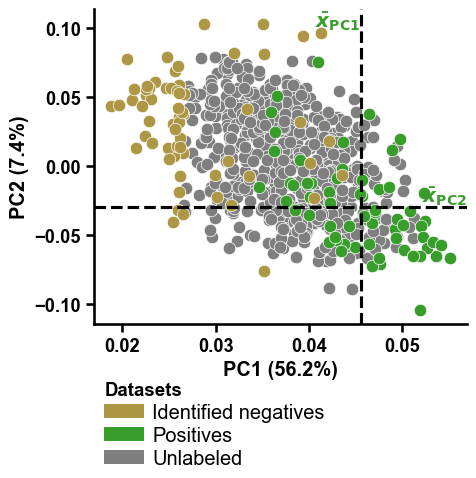

In [4]:
import matplotlib.pyplot as plt

# Override labels
labels = new_labels

# Plot samples in first two principal components of feature space
dpul_plot = aa.dPULearnPlot()
aa.plot_settings(font_scale=0.8)
dpul_plot.pca(df_pu=df_pu, labels=labels)
plt.tight_layout()
plt.show()

The dashed lines indicate the mean values across the positive samples for the PC1 and PC2, based on which the samples from the unlabeled group with the greatest distance were identified as reliable negatives by dPULearn. This becomes more clear using boolean masks and the ``show_pos_mean_x`` and ``show_pos_mean_y`` parameters: 

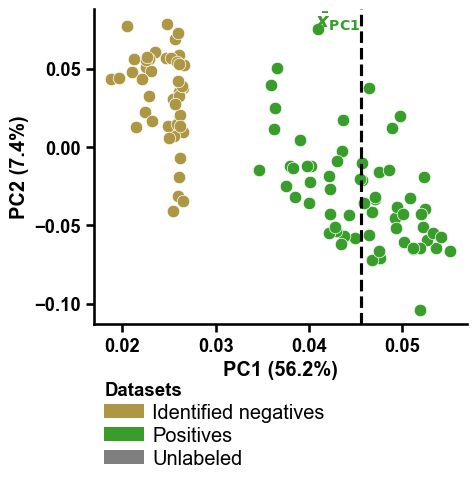

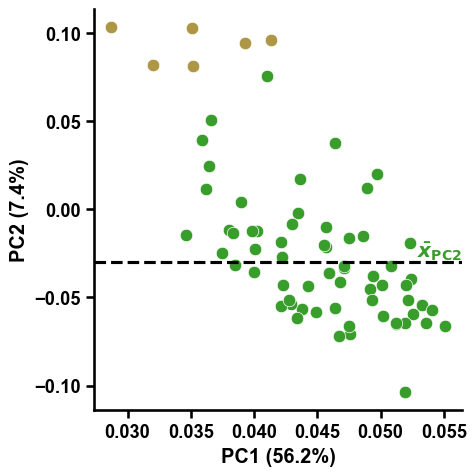

In [5]:
# Filter only positives and negatives selected based on PC1
mask1 = [x in ["PC1", None] for x in df_pu["selection_via"]]
mask2 = [x in [0, 1] for x in labels]
mask = [m1 and m2 for m1, m2 in zip(mask1, mask2)]
dpul_plot.pca(df_pu=df_pu[mask], labels=labels[mask], show_pos_mean_y=False)
plt.tight_layout()
plt.show()

# Filter only positives and negatives selected based on PC1
mask1 = [x in ["PC2", None] for x in df_pu["selection_via"]]
mask = [m1 and m2 for m1, m2 in zip(mask1, mask2)]
dpul_plot.pca(df_pu=df_pu[mask], labels=labels[mask], show_pos_mean_x=False, legend=False)
plt.tight_layout()
plt.show()

More details on the ``dPULearn`` and ``dPULearn`` classes are given in the [PU Learning API](https://aaanalysis.readthedocs.io/en/latest/api.html#pu-learning). More background information on PU learning are available in our [dPULearn Usage Principles](https://aaanalysis.readthedocs.io/en/latest/index/usage_principles/pu_learning.html) section.